In [2]:
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
#from scipy.stats import beta
#from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model

df = pd.read_excel("/Users/arturomercado/Documents/UNAM/7mo Semestre/ML/Tarea 1/lineal_horm.xlsx")

#Filtremos por lote

df_A = df[df["lote"] == "A"]
X_A = df_A[["horas"]]
y_A = df_A[["monto"]]
df_B = df[df["lote"] == "B"]
X_B = df_B[["horas"]]
y_B = df_B[["monto"]]
df_C = df[df["lote"] == "C"]
X_C = df_C[["horas"]]
y_C = df_C[["monto"]]

#Ajustemos la regresion lineal para cada lote

lmA = linear_model.LinearRegression()
lmB = linear_model.LinearRegression()
lmC = linear_model.LinearRegression()

lmA.fit(X_A,y_A)
lmB.fit(X_B,y_B)
lmC.fit(X_C,y_C)

#Obtención de parámetros para cada lote

coef1A = lmA.coef_
coef2A = lmA.intercept_

coef1B = lmB.coef_
coef2B = lmB.intercept_

coef1C = lmC.coef_
coef2C = lmC.intercept_

#Obtención de los errores para cada lote
err_coef1A = (np.sqrt(sum(((y_A.to_numpy()).reshape(-1)-(lmA.predict(X_A)).reshape(-1)) ** 2)/((9-2)*(sum((X_A-np.mean(X_A))**2))))).to_numpy()
err_coef1B = (np.sqrt(sum(((y_B.to_numpy()).reshape(-1)-(lmB.predict(X_B)).reshape(-1)) ** 2)/((9-2)*(sum((X_B-np.mean(X_B))**2))))).to_numpy()
err_coef1C = (np.sqrt(sum(((y_C.to_numpy()).reshape(-1)-(lmC.predict(X_C)).reshape(-1)) ** 2)/((9-2)*(sum((X_C-np.mean(X_C))**2))))).to_numpy()
err_coef1A = np.array(err_coef1A)
err_coef1B = np.array(err_coef1B)
err_coef1C = np.array(err_coef1C)

In [3]:
#declaración de variables que contendran los parametros y errores para cada muestra bootstrap

c1A = []
c2A = []
c1B = []
c2B = []
c1C = []
c2C = []
err_c1A = []
err_c2A = []
err_c1B = []
err_c2B = []
err_c1C = []
err_c2C = []

#Bootsrap

for i in range(1,1000):
    bootstrapA = df_A.sample(n = 9, replace = True)
    bootstrapB = df_B.sample(n = 9, replace = True)
    bootstrapC = df_C.sample(n = 9, replace = True)
    lmA2 = linear_model.LinearRegression()
    lmB2 = linear_model.LinearRegression()
    lmC2 = linear_model.LinearRegression()
    lmA2.fit(bootstrapA[["horas"]],bootstrapA[["monto"]])
    lmB2.fit(bootstrapB[["horas"]],bootstrapB[["monto"]])
    lmC2.fit(bootstrapC[["horas"]],bootstrapC[["monto"]])
    c1A.append(lmA2.coef_.reshape(-1)[0])
    c2A.append(lmA2.intercept_.reshape(-1)[0])
    c1B.append(lmB2.coef_.reshape(-1)[0])
    c2B.append(lmB2.intercept_.reshape(-1)[0])
    c1C.append(lmC2.coef_.reshape(-1)[0])
    c2C.append(lmC2.intercept_.reshape(-1)[0])
    #Calculo de los errores
    err_c1A.append((np.sqrt(sum((((bootstrapA[["monto"]]).to_numpy()).reshape(-1)-(lmA2.predict(bootstrapA[["horas"]])).reshape(-1)) ** 2)/((9-2)*(sum((bootstrapA[["horas"]]-np.mean(bootstrapA[["horas"]]))**2))))).to_numpy())
    #err_c2A.append((np.sqrt(sum((((bootstrapA[["monto"]]).to_numpy()).reshape(-1)-(lmA2.predict(bootstrapA[["horas"]])).reshape(-1)) ** 2)/((9-2)*(sum((bootstrapA[["horas"]]-np.mean(bootstrapA[["horas"]]))**2))))).to_numpy())
    err_c1B.append((np.sqrt(sum((((bootstrapB[["monto"]]).to_numpy()).reshape(-1)-(lmB2.predict(bootstrapB[["horas"]])).reshape(-1)) ** 2)/((9-2)*(sum((bootstrapB[["horas"]]-np.mean(bootstrapB[["horas"]]))**2))))).to_numpy())
    #err_c2B.append((np.sqrt(sum((((bootstrapB[["monto"]]).to_numpy()).reshape(-1)-(lmB2.predict(bootstrapB[["horas"]])).reshape(-1)) ** 2)/((9-2)*(sum((bootstrapB[["horas"]]-np.mean(bootstrapB[["horas"]]))**2))))).to_numpy())
    err_c1C.append((np.sqrt(sum((((bootstrapC[["monto"]]).to_numpy()).reshape(-1)-(lmC2.predict(bootstrapC[["horas"]])).reshape(-1)) ** 2)/((9-2)*(sum((bootstrapC[["horas"]]-np.mean(bootstrapC[["horas"]]))**2))))).to_numpy())
    #err_c2C.append((np.sqrt(sum((((bootstrapC[["monto"]]).to_numpy()).reshape(-1)-(lmC2.predict(bootstrapC[["horas"]])).reshape(-1)) ** 2)/((9-2)*(sum((bootstrapC[["horas"]]-np.mean(bootstrapC[["horas"]]))**2))))).to_numpy())
    #err_c1A.append((np.sqrt(sum((coef1A-c1A) ** 2)/((9-2)*(sum((bootstrapA[["horas"]]-np.mean(bootstrapA[["horas"]]))**2))))).to_numpy())
    #err_c2A.append((np.sqrt(sum((coef2A-c2A) ** 2)/((9-2)*(sum((bootstrapA[["horas"]]-np.mean(bootstrapA[["horas"]]))**2))))).to_numpy())
    #err_c1B.append((np.sqrt(sum((coef1B-c1B) ** 2)/((9-2)*(sum((bootstrapB[["horas"]]-np.mean(bootstrapB[["horas"]]))**2))))).to_numpy())
    #err_c2B.append((np.sqrt(sum((coef2B-c2B) ** 2)/((9-2)*(sum((bootstrapB[["horas"]]-np.mean(bootstrapB[["horas"]]))**2))))).to_numpy())
    #err_c1C.append((np.sqrt(sum((coef1C-c1C) ** 2)/((9-2)*(sum((bootstrapC[["horas"]]-np.mean(bootstrapC[["horas"]]))**2))))).to_numpy())
    #err_c2C.append((np.sqrt(sum((coef2C-c2C) ** 2)/((9-2)*(sum((bootstrapC[["horas"]]-np.mean(bootstrapC[["horas"]]))**2))))).to_numpy())
    
err_c1A = np.array(err_c1A)
#err_c2A = np.array(err_c2A)
err_c1B = np.array(err_c1B)
#err_c2B = np.array(err_c2B)
err_c1C = np.array(err_c1C)
#err_c2C = np.array(err_c2C)

c1A = np.array(c1A)
c2A = np.array(c2A)
c1B = np.array(c1B)
c2B = np.array(c2B)
c1C = np.array(c1C)
c2C = np.array(c2C)




# Lote A

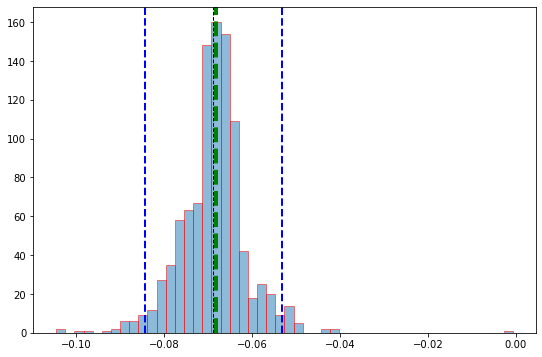

Coeficiente 1 sin Bootsrap: [[-0.06829557]]
Promedio de Coeficientes 1 de las muestras Bootstrap: -0.06882743823614045
( -0.08445320434374616 , -0.053168608333043384 )


In [4]:
fig, ax = plt.subplots(figsize=(9,6))
hist(c1A,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=coef1A,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(c1A),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(c1A,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(c1A,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Coeficiente 1 sin Bootsrap:", coef1A)
print("Promedio de Coeficientes 1 de las muestras Bootstrap:", np.mean(c1A))
print("(", percentile(c1A,2.5),",",percentile(c1A,97.5),")")

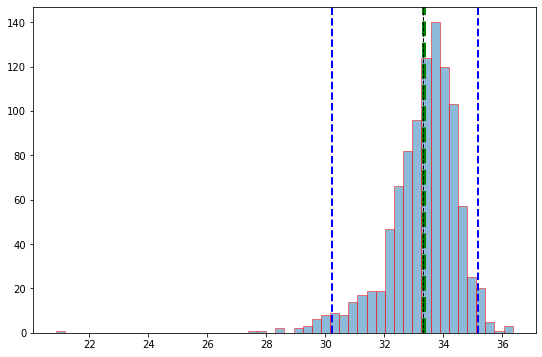

30.230568481784353
35.177365423947975
Coeficiente 2 sin Bootsrap: [33.36005531]
Promedio de Coeficientes 2 de las muestras Bootstrap: 33.30674937144096
( 30.230568481784353 , 35.177365423947975 )


In [5]:
fig, ax = plt.subplots(figsize=(9,6))
hist(c2A,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=coef2A,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(c2A),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(c2A,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(c2A,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print(percentile(c2A,2.5))
print(percentile(c2A,97.5))
print("Coeficiente 2 sin Bootsrap:", coef2A)
print("Promedio de Coeficientes 2 de las muestras Bootstrap:", np.mean(c2A))
print("(", percentile(c2A,2.5),",",percentile(c2A,97.5),")")

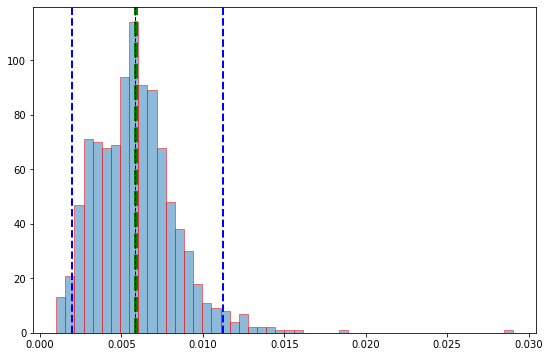

Error estandar sin Bootsrap: [0.0058789]
Promedio de los errores de las muestras Bootstrap: 0.005840918706829856
( 0.0019687329600328912 , 0.011243509527121904 )


In [6]:
fig, ax = plt.subplots(figsize=(9,6))
hist(err_c1A,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=err_coef1A,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(err_c1A),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(err_c1A,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(err_c1A,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error estandar sin Bootsrap:", err_coef1A)
print("Promedio de los errores de las muestras Bootstrap:", np.mean(err_c1A))
print("(", percentile(err_c1A,2.5),",",percentile(err_c1A,97.5),")")

# Lote B

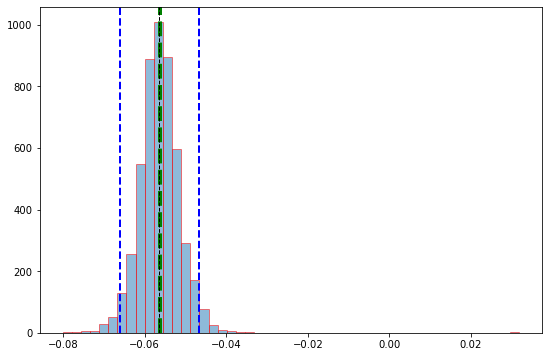

Coeficiente 1 sin Bootsrap: [[-0.05628513]]
Promedio de Coeficientes 1 de las muestras Bootstrap: -0.056408113148751764
( -0.06605290959790555 , -0.04664573033297436 )


In [84]:
fig, ax = plt.subplots(figsize=(9,6))
hist(c1B,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=coef1B,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(c1B),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(c1B,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(c1B,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Coeficiente 1 sin Bootsrap:", coef1B)
print("Promedio de Coeficientes 1 de las muestras Bootstrap:", np.mean(c1B))
print("(", percentile(c1B,2.5),",",percentile(c1B,97.5),")")

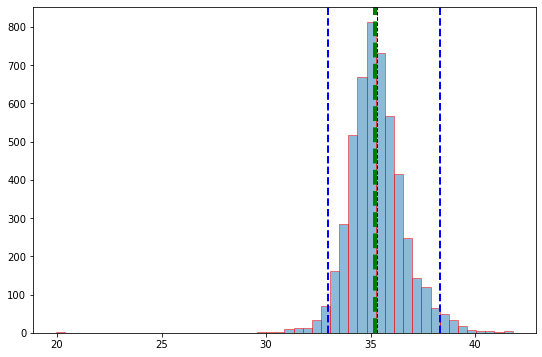

32.97585484486139
38.31618550958111
Coeficiente 2 sin Bootsrap: [35.20611669]
Promedio de Coeficientes 1 de las muestras Bootstrap: 35.30062481307171
( 32.97585484486139 , 38.31618550958111 )


In [83]:
fig, ax = plt.subplots(figsize=(9,6))
hist(c2B,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=coef2B,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(c2B),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(c2B,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(c2B,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print(percentile(c2B,2.5))
print(percentile(c2B,97.5))
print("Coeficiente 2 sin Bootsrap:", coef2B)
print("Promedio de Coeficientes 2 de las muestras Bootstrap:", np.mean(c2B))
print("(", percentile(c2B,2.5),",",percentile(c2B,97.5),")")

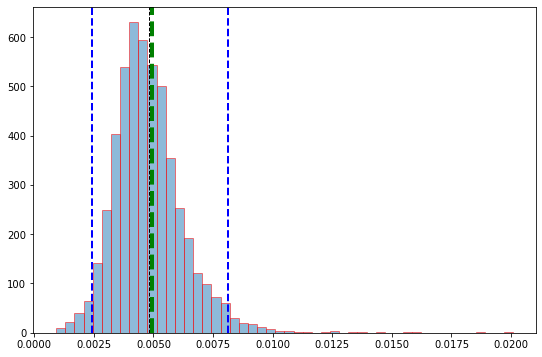

Error estandar sin Bootsrap: [0.00492906]
Promedio de los errores de las muestras Bootstrap: 0.004792780006571841
( 0.0024278095458234506 , 0.008130111730157067 )


In [85]:
fig, ax = plt.subplots(figsize=(9,6))
hist(err_c1B,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=err_coef1B,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(err_c1B),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(err_c1B,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(err_c1B,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error estandar sin Bootsrap:", err_coef1B)
print("Promedio de los errores de las muestras Bootstrap:", np.mean(err_c1B))
print("(", percentile(err_c1B,2.5),",",percentile(err_c1B,97.5),")")

# Lote C

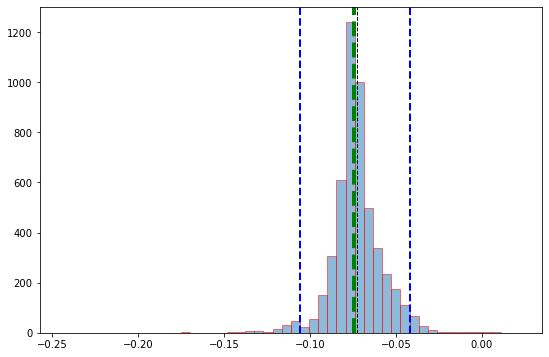

Coeficiente 1 sin Bootsrap: [[-0.07451756]]
Promedio de Coeficientes 1 de las muestras Bootstrap: -0.07289754153479272
( -0.10600670080356628 , -0.042080513599092435 )


In [88]:
fig, ax = plt.subplots(figsize=(9,6))
hist(c1C,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=coef1C,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(c1C),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(c1C,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(c1C,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Coeficiente 1 sin Bootsrap:", coef1C)
print("Promedio de Coeficientes 1 de las muestras Bootstrap:", np.mean(c1C))
print("(", percentile(c1C,2.5),",",percentile(c1C,97.5),")")

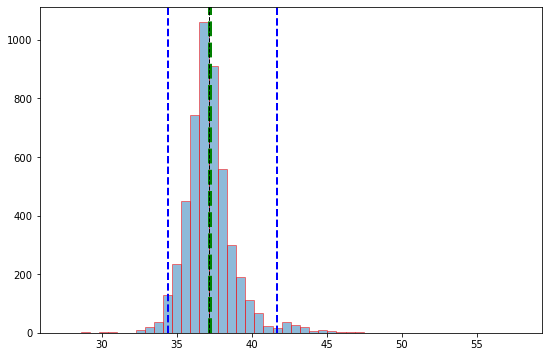

34.39645938931298
41.66583495186541
Coeficiente 2 sin Bootsrap: [37.1936709]
Promedio de Coeficientes 2 de las muestras Bootstrap: 37.155698523629866
( 34.39645938931298 , 41.66583495186541 )


In [87]:
fig, ax = plt.subplots(figsize=(9,6))
hist(c2C,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=coef2C,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(c2C),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(c2C,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(c2C,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print(percentile(c2C,2.5))
print(percentile(c2C,97.5))
print("Coeficiente 2 sin Bootsrap:", coef2C)
print("Promedio de Coeficientes 2 de las muestras Bootstrap:", np.mean(c2C))
print("(", percentile(c2C,2.5),",",percentile(c2C,97.5),")")

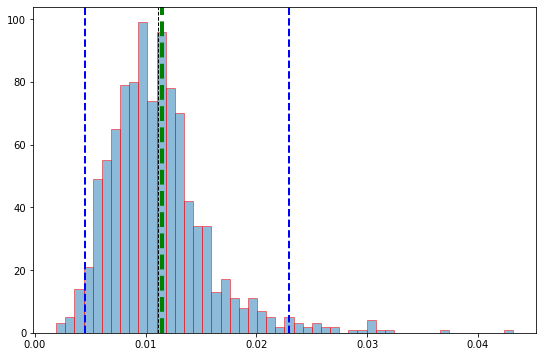

Error estandar sin Bootsrap: [0.01149529]
Promedio de los errores de las muestras Bootstrap: 0.011074732256207373
( 0.004493898750449108 , 0.022907662050568264 )


In [7]:
fig, ax = plt.subplots(figsize=(9,6))
hist(err_c1C,bins=50,alpha=0.5,edgecolor="red",label="Error estándar Boostrap")
axvline(x=err_coef1C,color='green', linestyle='--',linewidth=4,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(err_c1C),color='black', linestyle='--',linewidth=1,label="Promedio error estándar de b_1 con  Boostrap$")
axvline(percentile(err_c1C,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(err_c1C,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error estandar sin Bootsrap:", err_coef1C)
print("Promedio de los errores de las muestras Bootstrap:", np.mean(err_c1C))
print("(", percentile(err_c1C,2.5),",",percentile(err_c1C,97.5),")")

Para concluir podemos decir que realizar bootstrap sobre las variables de respuesta nos genera una mayor precisión como se puede observar en cada uno de los lotes, de igual manera se puede observar que los intervalos de confianza generados por las muestras bootstrap son muy aproximados a los generados por la regresión en R (se adjunta script con el codigo donde se obtienen dichos intervalos)

Tambien ordenaremos los lotes por tamaño de error en los residuales y así decidir cual es mejor:

El lote A tiene un error de 0.0058789
El lote B tiene un error de 0.00492906
El lote C tiene un error de 0.01149529

Si usarmos este como criterio para decidir que lote es mejor, diríamos que el lote B nos proporciona un menor error, sin embargo tenemos que tener un balance entre el resultado obtenido y el error estimado y dado que el error es relativamente pequeño en todos los lotes optaremos por usar el criterio de horas vs montos como indicador principal haciendo que elijamos el lote C como número uno pues es mejor a corto plazo eliminando la cantidad de componente.